In [1]:
import ujson 
import operator
import os
from collections import *
import pandas as pd
import networkx as nx
from datetime import datetime
import glob
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook

import numpy as np
import pandas

import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/shared/0/projects/cross-lingual-exchange/data/dataframes/en_de.tsv', sep='\t')
df.head()

EmptyDataError: No columns to parse from file

In [ ]:
df.set_index('user_id', inplace=True)
df.head()

In [265]:
g = nx.Graph()

with open('/shared-1/projects/cross-lingual-exchange/data/network_subsets/UK_DE.tsv') as f:
    for line in f:
        uid1 = line.split(' ')[0].strip()
        uid2 = line.split(' ')[1].strip()
        
        g.add_edge(uid1, uid2)

In [266]:
df['degree'] = 0
for user in df.index.values:
    df.loc[user, 'degree'] = g.degree[str(user)]

In [267]:
df['num_tweets'] = 0

with open('/shared/1/projects/cross-lingual-exchange/data/temp/relevant_users_with_lang.json', 'r') as f:
    users = ujson.load(f)
    
    for user, user_data in users.items():
        if int(user) in df.index.values:
            df.loc[int(user), 'num_tweets'] = user_data['num_tweets']

In [269]:
entity_to_pairs = []
potential_bridges = set()

df_dict = df.to_dict(orient='index')

for user, user_data in df_dict.items():
    if user_data['lang'] == 'BI':
        potential_bridges.add(user)

for entity, tweet_sets in tqdm_notebook(entity_tweets.items()):
    print("{}: fr = {} tweets, nl = {} tweets".format(entity, len(tweet_sets['fr_tweets']), len(tweet_sets['nl_tweets'])))
    for nl_tweet in tweet_sets['nl_tweets']:
        source = nl_tweet['user']['id']
       
        if source in df_dict:
            for bridge in potential_bridges:
                if (str(bridge) in g[str(source)] and bridge not in tweet_sets['nl_users'] 
                        and bridge not in tweet_sets['fr_users']):
                    entity_to_pairs.append({'source': source, 'bridge': bridge, 'entity': entity, 'tweet': nl_tweet})
                
    for fr_tweet in tweet_sets['fr_tweets']:
        source = fr_tweet['user']['id']
        
        if source in df_dict:
            for bridge in potential_bridges:
                if (str(bridge) in g[str(source)] and bridge not in tweet_sets['nl_users'] 
                        and bridge not in tweet_sets['fr_users']):
                    entity_to_pairs.append({'source': source, 'bridge': bridge, 'entity': entity, 'tweet': fr_tweet})

Spotify: fr = 303 tweets, nl = 336 tweets
Delhaize: fr = 125 tweets, nl = 201 tweets
WhatsApp: fr = 201 tweets, nl = 236 tweets
Mercedes: fr = 77 tweets, nl = 127 tweets
Woluwe: fr = 113 tweets, nl = 122 tweets
Laura: fr = 138 tweets, nl = 186 tweets
Neufchâteau: fr = 94 tweets, nl = 58 tweets
Arsenal: fr = 380 tweets, nl = 112 tweets
Messenger: fr = 106 tweets, nl = 94 tweets
Netflix: fr = 894 tweets, nl = 747 tweets
Sophie: fr = 147 tweets, nl = 233 tweets
India: fr = 8 tweets, nl = 145 tweets
YouTube: fr = 3393 tweets, nl = 3230 tweets
Brussels: fr = 588 tweets, nl = 799 tweets
Twitter: fr = 3339 tweets, nl = 3514 tweets
Limburg: fr = 10 tweets, nl = 1131 tweets
Leuven: fr = 48 tweets, nl = 1412 tweets
Megan: fr = 7 tweets, nl = 33 tweets
Mechelen: fr = 7 tweets, nl = 1614 tweets
Sclessin: fr = 129 tweets, nl = 65 tweets
Fortnite: fr = 373 tweets, nl = 94 tweets
Simon: fr = 150 tweets, nl = 159 tweets
Reynders: fr = 198 tweets, nl = 122 tweets
Mawda: fr = 94 tweets, nl = 107 tweets


Parlement: fr = 700 tweets, nl = 937 tweets
Congolese: fr = 7 tweets, nl = 75 tweets
United: fr = 343 tweets, nl = 244 tweets
Beveren: fr = 85 tweets, nl = 368 tweets
Batshuayi: fr = 119 tweets, nl = 114 tweets
Marrakech: fr = 177 tweets, nl = 267 tweets
London: fr = 55 tweets, nl = 110 tweets
Juventus: fr = 177 tweets, nl = 187 tweets
Waasland: fr = 92 tweets, nl = 218 tweets
Erdogan: fr = 106 tweets, nl = 295 tweets
Trump: fr = 1387 tweets, nl = 1587 tweets
Bayern: fr = 208 tweets, nl = 140 tweets
Lukaku: fr = 478 tweets, nl = 409 tweets
Philippe: fr = 588 tweets, nl = 212 tweets
Brexit: fr = 923 tweets, nl = 841 tweets
Karen: fr = 7 tweets, nl = 123 tweets
FakeNews: fr = 164 tweets, nl = 302 tweets
Thailand: fr = 5 tweets, nl = 96 tweets
Congo: fr = 446 tweets, nl = 217 tweets
Wallonie: fr = 1177 tweets, nl = 63 tweets
Zidane: fr = 250 tweets, nl = 100 tweets
Verviers: fr = 235 tweets, nl = 73 tweets
Orban: fr = 94 tweets, nl = 142 tweets
Roubaix: fr = 116 tweets, nl = 147 tweets
St

In [3]:
matched_df = pd.read_csv('/shared/0/projects/cross-lingual-exchange/data/dataframes/matched_df.tsv', sep='\t')
matched_df.head()

,Unnamed: 0,user_id,lang,bilinguality,country,betw,num_tweets,followers,following,hashtag_count,url_count,degree,friends_with_bridge,pr_score
0,1,231824167,es,1.0,Spain,6.061560e-06,3,575,744,0,1,52,1,0.795455
1,2,463643987,es,1.0,Spain,5.090252e-07,6,153,322,1,2,14,1,0.322552
2,3,463643665,es,1.0,Spain,3.128218e-07,12,290,106,2,9,32,0,0.556829
3,4,463642743,es,1.0,Spain,1.031442e-07,6,513,1349,0,3,8,0,0.273762
4,5,1854581233,es,1.0,Spain,6.046680e-08,24,338,171,0,6,10,1,0.290430


In [4]:
matched_df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
matched_df.set_index('index', inplace=True)
matched_df.head()

,user_id,lang,bilinguality,country,betw,num_tweets,followers,following,hashtag_count,url_count,degree,friends_with_bridge,pr_score
index,,,,,,,,,,,,,
1,231824167,es,1.0,Spain,6.061560e-06,3,575,744,0,1,52,1,0.795455
2,463643987,es,1.0,Spain,5.090252e-07,6,153,322,1,2,14,1,0.322552
3,463643665,es,1.0,Spain,3.128218e-07,12,290,106,2,9,32,0,0.556829
4,463642743,es,1.0,Spain,1.031442e-07,6,513,1349,0,3,8,0,0.273762
5,1854581233,es,1.0,Spain,6.046680e-08,24,338,171,0,6,10,1,0.290430


In [309]:
match_dict = {}

with open('/shared/1/projects/cross-lingual-exchange/data/dataframes/matched_pairs.tsv', 'r+') as f:
    for line in f:
        line = line.replace('\"', '')
        id1 = df.loc[int(line.split('\t')[0].strip()), 'user_id']
        id2 = df.loc[int(line.split('\t')[1].strip()), 'user_id']
        
        match_dict[id1] = id2

In [319]:
entity_to_type = {}
with open('/shared/1/projects/cross-lingual-exchange/data/temp/entity_types.txt', 'r+') as f:
    for line in f:
        entity = line.split(' ')[0].strip()
        entity_type = line.split(' ')[1].strip()
        
        entity_to_type[entity] = entity_type

In [320]:
entity_table = {'id': [], 'entity': [], 'condition': [], 'did_tweet': [], 'entity_type': []}

for entity, tweets in entity_tweets.items(): 
    print(entity)
    for id1, id2 in match_dict.items():
        entity_table['id'].append(int(id1))
        entity_table['entity'].append(entity)
        entity_table['condition'].append('target')
        
        if id1 in tweets['fr_users']:
            entity_table['did_tweet'].append(1)
        else:
            entity_table['did_tweet'].append(0)
            
        entity_table['entity_type'].append(entity_to_type[entity])  
        
        entity_table['id'].append(int(id2))
        entity_table['entity'].append(entity)
        entity_table['condition'].append('control')
        
        if id2 in tweets['fr_users']:
            entity_table['did_tweet'].append(1)
        else:
            entity_table['did_tweet'].append(0)
        
        entity_table['entity_type'].append(entity_to_type[entity])  

Spotify
Delhaize
WhatsApp
Mercedes
Woluwe
Laura
Neufchâteau
Arsenal
Messenger
Netflix
Sophie
India
YouTube
Brussels
Twitter
Limburg
Leuven
Megan
Mechelen
Sclessin
Fortnite
Simon
Reynders
Mawda
Pakistan
Ariana
Spurs
Mourinho
Louise
Patrick
Labour
Vlaams
Jette
Bruyne
Henry
Bordeaux
Eupen
Hollywood
Ryanair
Serieus
Erasmus
GiletsJaunes
Frank
Samsung
Thibaut
Halloween
Obama
Tomorrowland
Saudi
Cyprus
Greenpeace
Mohammed
Danny
Bruges
Google
LinkedIn
Cercle
Porsche
Juncker
Santini
Putin
Roger
Beyoncé
Senegal
Steven
Puigdemont
Bitcoin
Michael
Inter
Israël
Julie
Sagan
Colombia
Thomas
Pogba
Proficiat
Hitler
Snapchat
Ramadan
Brabant
Theresa
Istanbul
Minister
Canada
Fellaini
Amazon
Charleroi
Tottenham
Chelsea
Madrid
Lommel
Liverpool
Riverdale
Mexico
Dortmund
Kompany
Maastricht
Nigeria
Barcelona
Martinez
Colruyt
Egypte
Tinder
Rwanda
Merkel
Apple
Lucas
Charles
Lille
Hazard
Hamas
Wikipedia
Bundesliga
Tesla
Charlotte
Salah
Ibiza
Zaventem
Cristiano
Robin
Infrabel
Amsterdam
Japan
Astrid
Diesel
Disneyland

In [321]:
columns = ['id', 'entity', 'condition', 'did_tweet', 'entity_type']
entity_table = pd.DataFrame(entity_table, columns=columns)

In [322]:
entity_table.head()

,id,entity,condition,did_tweet,entity_type
0,58773,Spotify,target,0,App
1,38326070,Spotify,control,0,App
2,1708038163,Spotify,target,0,App
3,171487487,Spotify,control,0,App
4,379691053,Spotify,target,0,App


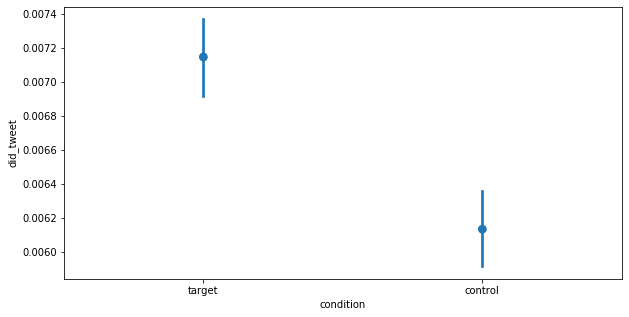

In [324]:
ax = sns.pointplot(x="condition", y="did_tweet", data=entity_table, join=False)

In [337]:
match_dict = {}

with open('/shared/1/projects/cross-lingual-exchange/data/dataframes/matched_pairs.tsv', 'r+') as f:
    for line in f:
        line = line.replace('\"', '')
        id1 = df.loc[int(line.split('\t')[0].strip()), 'user_id']
        id2 = df.loc[int(line.split('\t')[1].strip()), 'user_id']
        
        match_dict[id1] = id2

In [340]:
nl_entity_table = {'id': [], 'entity': [], 'condition': [], 'did_tweet': [], 'entity_type': []}
for entity, tweets in entity_tweets.items(): 
    for id1, id2 in match_dict.items():
        nl_entity_table['id'].append(id1)
        nl_entity_table['entity'].append(entity)
        nl_entity_table['condition'].append('target')
        
        if id1 in tweets['fr_users']:
            nl_entity_table['did_tweet'].append(1)
        else:
            nl_entity_table['did_tweet'].append(0)
            
        nl_entity_table['entity_type'].append(entity_to_type[entity])  
        
        nl_entity_table['id'].append(id2)
        nl_entity_table['entity'].append(entity)
        nl_entity_table['condition'].append('control')
        
        if id2 in tweets['fr_users']:
            nl_entity_table['did_tweet'].append(1)
        else:
            nl_entity_table['did_tweet'].append(0)
        
        nl_entity_table['entity_type'].append(entity_to_type[entity])  

In [341]:
columns = ['id', 'entity', 'condition', 'did_tweet', 'entity_type']
nl_entity_table = pd.DataFrame(entity_table, columns=columns)

In [342]:
frames = [entity_table, nl_entity_table]
result = pd.concat(frames)

In [343]:
result.head()

,id,entity,condition,did_tweet,entity_type
0,58773,Spotify,target,0,App
1,38326070,Spotify,control,0,App
2,1708038163,Spotify,target,0,App
3,171487487,Spotify,control,0,App
4,379691053,Spotify,target,0,App


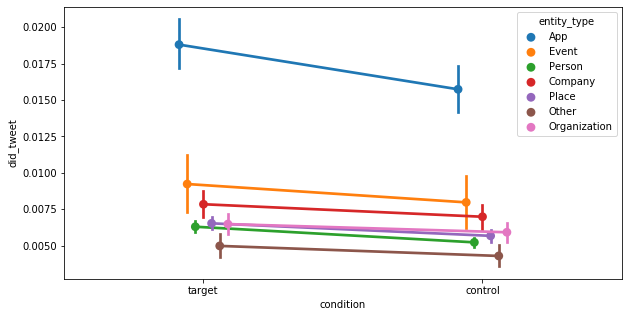

In [367]:
mean_differences = {}

target = entity_table[entity_table.condition=='target']
control = entity_table[entity_table.condition=='control']

for entity, ent_type in entity_to_type.items():
    mean_differences[ent_type] = np.mean(target[target.entity_type==ent_type]['did_tweet']) - np.mean(control[control.entity_type==ent_type]['did_tweet'])

sorted_mean_differences = sorted(mean_differences.items(), key=operator.itemgetter(1), reverse=True)
sorted_hue_order = [item[0] for item in sorted_mean_differences]

ax = sns.pointplot(x="condition", y="did_tweet", data=entity_table, dodge=True, hue='entity_type', hue_order=sorted_hue_order)